<a href="https://colab.research.google.com/github/fatihdzaki01/Projek_PDS_RegresiLinier/blob/main/Projek_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Import Library yang Dibutuhkan ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium import Choropleth
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
import statsmodels.api as sm

# tampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
# --- Import Data ---
df = pd.read_csv('Taiwan_Air_Quality_Index_Data_2016~2024.csv')

# lihat 5 baris pertama
df.head()


/tmp/ipython-input-58752451.py:2: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Taiwan_Air_Quality_Index_Data_2016~2024.csv')


,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,2024-08-31 23:00,Hukou,Hsinchu County,62.0,PM2.5,Moderate,0.9,0.17,35.0,40.2,18.0,17.0,2.3,2.6,0.3,2.3,225,NaN,0.2,20.1,26.0,1.0,121.038869,24.900097,22.0
1,2024-08-31 23:00,Zhongming,Taichung City,50.0,NaN,Good,1.6,0.32,27.9,35.1,27.0,14.0,7.6,9.3,1.6,1.1,184,NaN,0.2,15.3,23.0,1.0,120.641092,24.151958,31.0
2,2024-08-31 23:00,Zhudong,Hsinchu County,45.0,NaN,Good,0.4,0.17,25.1,40.6,21.0,13.0,2.9,4.1,1.1,0.4,210,NaN,0.2,13.8,24.0,0.0,121.088955,24.740914,23.0
3,2024-08-31 23:00,Hsinchu,Hsinchu City,42.0,NaN,Good,0.8,0.2,30.0,35.9,19.0,10.0,4.0,4.8,0.7,1.9,239,NaN,0.2,13.0,26.0,1.0,120.972368,24.805636,24.0
4,2024-08-31 23:00,Toufen,Miaoli County,50.0,NaN,Good,1.0,0.16,33.5,35.9,18.0,14.0,1.8,3.1,1.2,1.8,259,NaN,0.1,15.3,28.0,1.0,120.898693,24.696907,25.0


In [ ]:
df['status'].unique()


array(['Moderate', 'Good', nan, 'Unhealthy for Sensitive Groups',
       'Unhealthy', 'Very Unhealthy', 'Hazardous'], dtype=object)

In [ ]:
# --- Eksplorasi Awal ---
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21456 entries, 0 to 21455
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       21456 non-null  object 
 1   sitename   21456 non-null  object 
 2   county     21456 non-null  object 
 3   aqi        21435 non-null  float64
 4   pollutant  4961 non-null   object 
 5   status     21417 non-null  object 
 6   so2        21061 non-null  float64
 7   co         21229 non-null  float64
 8   o3         21190 non-null  float64
 9   o3_8hr     21363 non-null  float64
 10  pm10       21195 non-null  float64
 11  pm2.5      21210 non-null  float64
 12  no2        21096 non-null  float64
 13  nox        21096 non-null  float64
 14  no         21096 non-null  float64
 15  windspeed  21281 non-null  object 
 16  winddirec  21272 non-null  object 
 17  unit       0 non-null      float64
 18  co_8hr     21406 non-null  float64
 19  pm2.5_avg  21360 non-null  float64
 20  pm10_a

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
count,21435.000000,21061.000000,21229.000000,21190.000000,21363.000000,21195.000000,21210.000000,21096.000000,21096.000000,21096.000000,0.0,21406.000000,21360.000000,21380.000000,21358.000000,21455.000000,21455.000000,21455.000000
mean,40.308747,1.076791,0.220425,28.555913,28.344128,21.808068,11.986280,7.103380,9.396122,2.252361,NaN,0.171031,11.813038,21.226801,0.561382,120.817850,24.026830,57.366581
std,14.740296,0.817096,0.170875,17.954768,15.007596,8.788722,5.652673,5.916966,10.000459,5.335491,NaN,0.150158,4.626437,6.469129,0.564641,0.598447,0.993011,63.675253
min,-1.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,2.000000,0.000000,118.312256,21.958069,1.000000
25%,30.000000,0.600000,0.130000,14.200000,16.500000,16.000000,8.000000,3.200000,4.200000,0.600000,NaN,0.100000,8.500000,17.000000,0.000000,120.345531,23.048197,22.000000
50%,39.000000,1.000000,0.180000,25.500000,26.400000,21.000000,11.000000,5.400000,6.700000,1.100000,NaN,0.100000,11.400000,21.000000,1.000000,120.678444,24.131672,43.000000
75%,49.000000,1.400000,0.250000,40.600000,38.900000,26.000000,15.000000,9.100000,11.000000,1.800000,NaN,0.200000,14.700000,25.000000,1.000000,121.432500,24.994711,65.000000
max,129.000000,25.200000,3.220000,133.400000,79.700000,227.000000,52.000000,56.300000,137.800000,99.300000,NaN,2.200000,36.800000,77.000000,5.000000,121.792928,26.153736,313.000000


In [ ]:
# cek missing value
print(df.isnull().sum())

date             0
sitename         0
county           0
aqi             21
pollutant    16495
status          39
so2            395
co             227
o3             266
o3_8hr          93
pm10           261
pm2.5          246
no2            360
nox            360
no             360
windspeed      175
winddirec      184
unit         21456
co_8hr          50
pm2.5_avg       96
pm10_avg        76
so2_avg         98
longitude        1
latitude         1
siteid           1
dtype: int64


In [ ]:
# persentase missing value
(df.isnull().sum() / len(df)) * 100

,0
date,0.000000
sitename,0.000000
county,0.000000
aqi,0.097875
pollutant,76.878262
status,0.181767
so2,1.840977
co,1.057979
o3,1.239746
o3_8hr,0.433445


In [ ]:
#cek duplikat
df.duplicated().any()

np.False_

In [ ]:
df['status'].unique()

array(['Moderate', 'Good', nan, 'Unhealthy for Sensitive Groups',
       'Unhealthy', 'Very Unhealthy', 'Hazardous'], dtype=object)

In [ ]:
df.groupby('status')['aqi'].agg(['min', 'max']).reset_index()

,status,min,max
0,Good,0.0,50.0
1,Hazardous,307.0,467.0
2,Moderate,51.0,100.0
3,Unhealthy,151.0,200.0
4,Unhealthy for Sensitive Groups,101.0,150.0
5,Very Unhealthy,201.0,280.0


In [ ]:
# --- Konversi kolom numerik yang salah tipe data ke float ---
cols_num = ['aqi', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2',
             'nox', 'no', 'windspeed', 'winddirec', 'co_8hr',
             'pm2.5_avg', 'pm10_avg', 'so2_avg']

for c in cols_num:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# --- Isi missing value pada kolom numerik (median) karena lebih tahan terhadap outlier dibanding mean. ---
for c in cols_num:
    if c in df.columns:
        median_value = df[c].median()
        df[c] = df[c].fillna(median_value)

# --- Kolom dengan terlalu banyak missing value (>40%) bisa di-drop ---
missing_ratio = df.isna().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.4].index
df = df.drop(columns=cols_to_drop)

# --- Kolom koordinat atau identitas lokasi (sedikit null) ---
# --- Kalau baris tidak punya nilai di kolom ini dihapus, karena tidak bisa dipakai untuk analisis geografis atau visualisasi peta ---
id_cols = ['longitude', 'latitude', 'siteid']
for c in id_cols:
    if c in df.columns:
        df = df.dropna(subset=[c])

In [ ]:
# Fungsi untuk menentukan status berdasarkan nilai AQI
def categorize_aqi(aqi):
    if pd.isna(aqi):
        return None  # biarkan kosong dulu kalau AQI juga missing
    elif 0 <= aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100:
        return 'Moderate'
    elif 101 <= aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= aqi <= 200:
        return 'Unhealthy'
    elif 201 <= aqi <= 280:
        return 'Very Unhealthy'
    elif 307 <= aqi <= 467:
        return 'Hazardous'
    else:
        return 'Unknown'  # untuk nilai AQI di luar rentang yang ada

# Terapkan fungsi ke kolom status untuk isi missing value
df['status'] = df.apply(
    lambda row: categorize_aqi(row['aqi']) if pd.isna(row['status']) else row['status'],
    axis=1
)

In [ ]:
# --- Cek hasil akhir ---
print("Missing values setelah pembersihan:\n", df.isnull().sum())
print("\nKolom yang dihapus karena terlalu banyak null:", list(cols_to_drop))

Missing values setelah pembersihan:
 date         0
sitename     0
county       0
aqi          0
status       0
so2          0
co           0
o3           0
o3_8hr       0
pm10         0
pm2.5        0
no2          0
nox          0
no           0
windspeed    0
winddirec    0
co_8hr       0
pm2.5_avg    0
pm10_avg     0
so2_avg      0
longitude    0
latitude     0
siteid       0
dtype: int64

Kolom yang dihapus karena terlalu banyak null: ['pollutant', 'unit']


In [ ]:
df[["aqi","so2","co","o3","o3_8hr","pm10","pm2.5","no2","nox","no",
     "windspeed","winddirec","co_8hr","pm2.5_avg","pm10_avg","so2_avg"]].dtypes


,0
aqi,float64
so2,float64
co,float64
o3,float64
o3_8hr,float64
pm10,float64
pm2.5,float64
no2,float64
nox,float64
no,float64


In [ ]:
# Cek apakah sudah bersih
print(df[cols_num].dtypes)


aqi          float64
so2          float64
co           float64
o3           float64
o3_8hr       float64
pm10         float64
pm2.5        float64
no2          float64
nox          float64
no           float64
windspeed    float64
winddirec    float64
co_8hr       float64
pm2.5_avg    float64
pm10_avg     float64
so2_avg      float64
dtype: object


In [ ]:
Y = df["aqi"]
X = df[["so2","co","o3","o3_8hr","pm10","pm2.5","no2","nox","no",
        "windspeed","winddirec","co_8hr","pm2.5_avg","pm10_avg","so2_avg"]]

# Tambahkan intercept
# Tambahkan intercept supaya model regresi bisa fit data dengan benar, menampilkan baseline, dan menghasilkan koefisien yang valid.
X = sm.add_constant(X)


In [ ]:
# model OLS (Ordinary Least Squares)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    aqi   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.017e+06
Date:                Sun, 09 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:14:19   Log-Likelihood:            -4.4007e+06
No. Observations:             1298868   AIC:                         8.801e+06
Df Residuals:                 1298852   BIC:                         8.802e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9473      0.023    128.026      0.0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,13.409636
1,so2,1.501413
2,co,5.967186
3,o3,2.967070
4,o3_8hr,2.658777
5,pm10,8.602579
6,pm2.5,9.610013
7,no2,13368.485810
8,nox,36016.902902
9,no,10153.693967


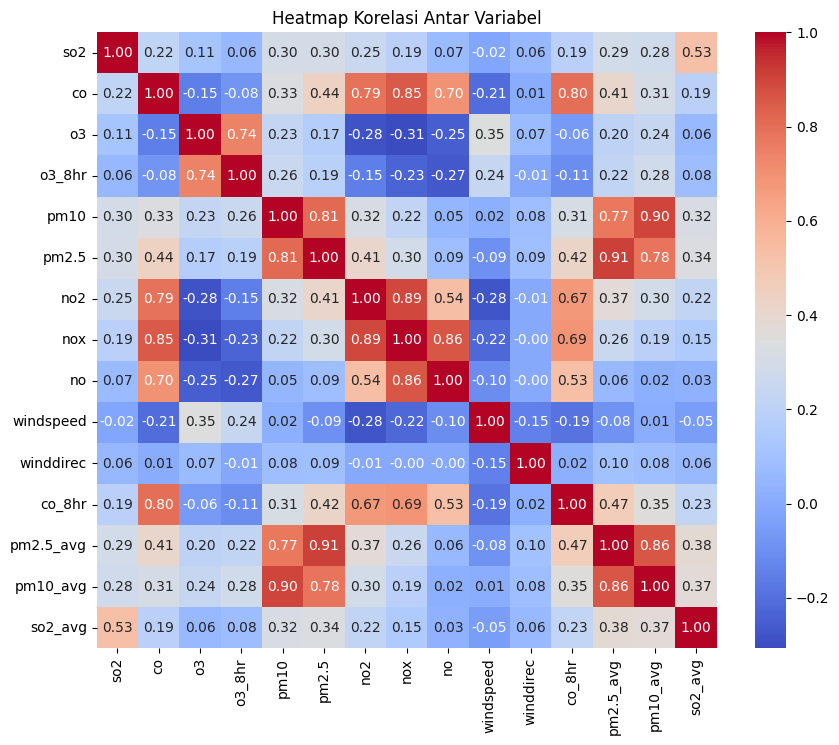

In [ ]:
corr_matrix = df[['so2','co','o3','o3_8hr','pm10','pm2.5','no2','nox','no','windspeed',
                  'winddirec','co_8hr','pm2.5_avg','pm10_avg','so2_avg']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


In [ ]:
import statsmodels.api as sm

# Contoh variabel independen dan dependen
X = df[['so2_avg', 'co', 'o3', 'windspeed', 'winddirec']]
y = df['aqi']

# Tambahkan intercept
X = sm.add_constant(X)

# Buat objek OLS
model = sm.OLS(y, X)

# Fungsi untuk cek apakah model sudah fit
def check_fit(model_obj):
    try:
        # Coba akses residual
        _ = model_obj.resid
        print("Model sudah fit")
    except AttributeError:
        print("Model BELUM fit, panggil .fit() dulu")

# Cek sebelum fit
check_fit(model)  # Output: Model BELUM fit

# Fit model
model_fitted = model.fit()

# Cek setelah fit
check_fit(model_fitted)  # Output: Model sudah fit

Model BELUM fit, panggil .fit() dulu
Model sudah fit


In [ ]:
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    aqi   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.550e+05
Date:                Sun, 09 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:00:56   Log-Likelihood:            -5.7265e+06
No. Observations:             1295029   AIC:                         1.145e+07
Df Residuals:                 1295023   BIC:                         1.145e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9900      0.058    206.360      0.0

In [ ]:
residuals = model_fitted.resid

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

     feature        VIF
0      const  10.772989
1    so2_avg   1.052044
2         co   1.093952
3         o3   1.174253
4  windspeed   1.208649
5  winddirec   1.041614


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# misal model adalah hasil dari OLS
# model = sm.OLS(y, X).fit()

# Ambil residual dan variabel independen
residuals = model.resid
exog = model.model.exog

# Lakukan uji Breusch-Pagan
bp_test = het_breuschpagan(residuals, exog)

# Simpan hasilnya
labels = ['Lagrange multiplier statistic', 'p-value',
          'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': np.float64(72975.45126191761), 'p-value': np.float64(0.0), 'f-value': np.float64(5154.574160136841), 'f p-value': np.float64(0.0)}


p-value = 0.0 → sangat kecil, jauh di bawah 0.05

Artinya → tolak H0 → residual tidak konstan

Dengan kata lain, model mengalami heteroskedastisitas

In [ ]:
residuals = model_fitted.resid
exog = model_fitted.model.exog

bp_test = het_breuschpagan(residuals, exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\n=== Breusch-Pagan Test ===")
print(dict(zip(labels, bp_test)))


=== Breusch-Pagan Test ===
{'Lagrange multiplier statistic': np.float64(144563.3779297783), 'p-value': np.float64(0.0), 'f-value': np.float64(32545.587766433626), 'f p-value': np.float64(0.0)}


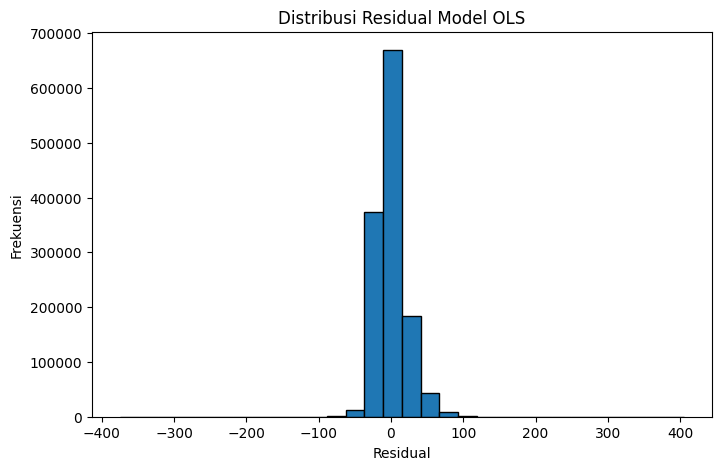

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(residuals[~np.isnan(residuals)], bins=30, edgecolor='k')
plt.title("Distribusi Residual Model OLS")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.show()

TADI AKU BENERIN SAMPE SINI GESS --YUKE

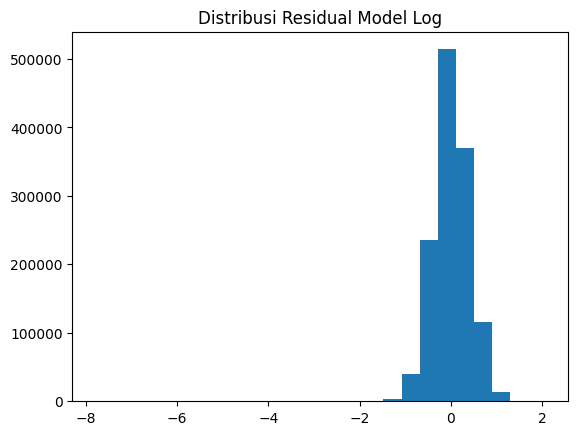

In [ ]:
df = df[df['aqi'] > 0]  # Hanya ambil nilai positif
df = df.dropna(subset=['aqi', 'so2_avg', 'co', 'o3', 'windspeed', 'winddirec'])

y = df['aqi']
X = df[['so2_avg', 'co', 'o3', 'windspeed', 'winddirec']]

# Karena sudah difilter, aman pakai log1p (lebih stabil)
y_log = np.log1p(y)

model_transformed = sm.OLS(y_log, sm.add_constant(X)).fit()

# Plot distribusi residual
import matplotlib.pyplot as plt
plt.hist(model_transformed.resid[~np.isnan(model_transformed.resid)], bins=25)
plt.title("Distribusi Residual Model Log")
plt.show()


In [ ]:
print(len(model_transformed.resid.dropna()))


4061398


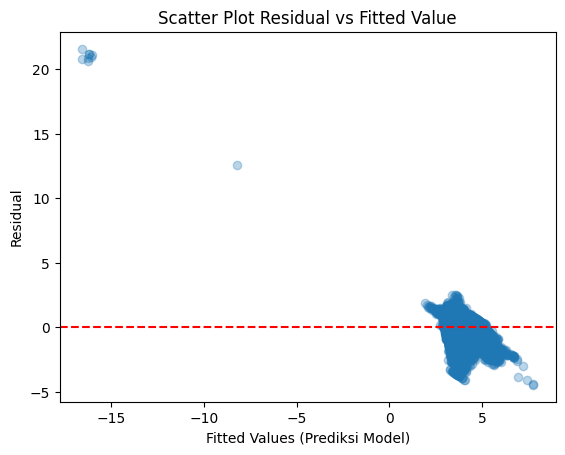

In [ ]:
import matplotlib.pyplot as plt

# Residual dan fitted value dari model
residuals = model_transformed.resid
fitted = model_transformed.fittedvalues

# Plot scatter residual vs fitted value
plt.scatter(fitted, residuals, alpha=0.3)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Prediksi Model)')
plt.ylabel('Residual')
plt.title('Scatter Plot Residual vs Fitted Value')
plt.show()


In [ ]:
from scipy.stats import shapiro
residuals = model_transformed.resid.dropna()
stat, p = shapiro(residuals.sample(5000))  # Gunakan sampel 5000 karena big data
print('Shapiro-Wilk Test: stat=%.3f, p-value=%.3f' % (stat, p))


Shapiro-Wilk Test: stat=0.998, p-value=0.000
